# Cardiovascular Disease Prediction 

## Task
To perform an analysis and fit a logistic regression model for predicting 10-year risk of coronary heart disease (CHD).

## Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

## Data Description
* Demographic:
    * Sex: male or female("M" or "F")
    * Age: Age of the patient;


* Behavioral
    * is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
    * Cigs Per Day: the number of cigarettes that the person smoked on average in one day.
    

* Medical( history)
    * BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    * Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    * Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    * Diabetes: whether or not the patient had diabetes (Nominal)
    * Medical(current)
    * Tot Chol: total cholesterol level (Continuous)
    * Sys BP: systolic blood pressure (Continuous)
    * Dia BP: diastolic blood pressure (Continuous)
    * BMI: Body Mass Index (Continuous)
    * Heart Rate: heart rate (Continuous)
    * Glucose: glucose level (Continuous)

 
* Predict variable (Desired Target)
    * 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


## Structure
The structure is as follows:
1. Data Cleaning 
2. EDA
3. Data Modelling and Testing
4. Improvements

## Initialization

In [1]:
!pip install plotly matplotlib seaborn --quiet
!pip install statsmodels pandas numpy 

import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv("cardiotrain.csv")

## Data Exploration

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df = df.drop(columns=['id'])

In [5]:
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
df.shape

(3390, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


Here we can see the following data structure. There are 3390 entries and 16 columns.

- Categorical Binary Columns(int and Object Datatype): 
    - sex
    - is_smoking
    - BPMeds
    - prevalentStroke
    - PrevalentHyp
    - Diabestes
    - TenYearCHD 
    
    
- Ordinal Categorical Columns:
    - education
    
    
- Continuous Variables
    - age
    - cigs_per_day
    - totChol
    - sysBP
    - diaBP
    - BMI
    - heartRate
    - glucose

Also, by looking at the result, I can see that there are some null values in the dataset. So, I further check how many null values are there per column using the isnull() below.

#### Checking for null values

In [8]:
count_null = df.isnull().sum().sum()
count_null

510

In [9]:
count_null/df.shape[0]

0.1504424778761062

Number of entries missing from the dataset = 510 (~15%)

In [10]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]

age                0.000000
education          0.025664
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.006490
BPMeds             0.012979
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011209
sysBP              0.000000
diaBP              0.000000
BMI                0.004130
heartRate          0.000295
glucose            0.089676
TenYearCHD         0.000000
dtype: float64

Glucose has the highest percentage for missing data i.e ~9%. Other columns like education, cigsPerDay, BPMeds, totChol, BMI, heartRate don't have a significant number of missing values.

Solution:
- Since, we already have a small dataset, I will handle the null values by imputing a mean/median/mode value as needed.

#### Checking for duplicates.

In [12]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

#### Outliers

In [13]:
df_numeric = df.select_dtypes(include='number')

columns_to_exclude = ['BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD', 'prevalentHyp', 'education']
df_numeric_filtered = df_numeric.drop(columns=columns_to_exclude, errors='ignore') 


In [14]:
Q1 = df_numeric_filtered.quantile(0.25)
Q3 = df_numeric_filtered.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_numeric_filtered[(df_numeric_filtered < lower_bound) | (df_numeric_filtered > upper_bound)].dropna(how='all')
print("Outliers based on IQR:")
outliers.count()

Outliers based on IQR:


age             0
cigsPerDay      9
totChol        43
sysBP         105
diaBP          58
BMI            77
heartRate      64
glucose       158
dtype: int64

In [15]:
print(f"In total there are {outliers.count().sum()} outlier values which is {round(outliers.count().sum()/df.shape[0]*100,2)}% of the data.")

In total there are 514 outlier values which is 15.16% of the data.


I will not be dropping these values as it will significantly reduce the size of our data. Instead, I will be using median instead of mean as mean is strongly influenced by the outliers.

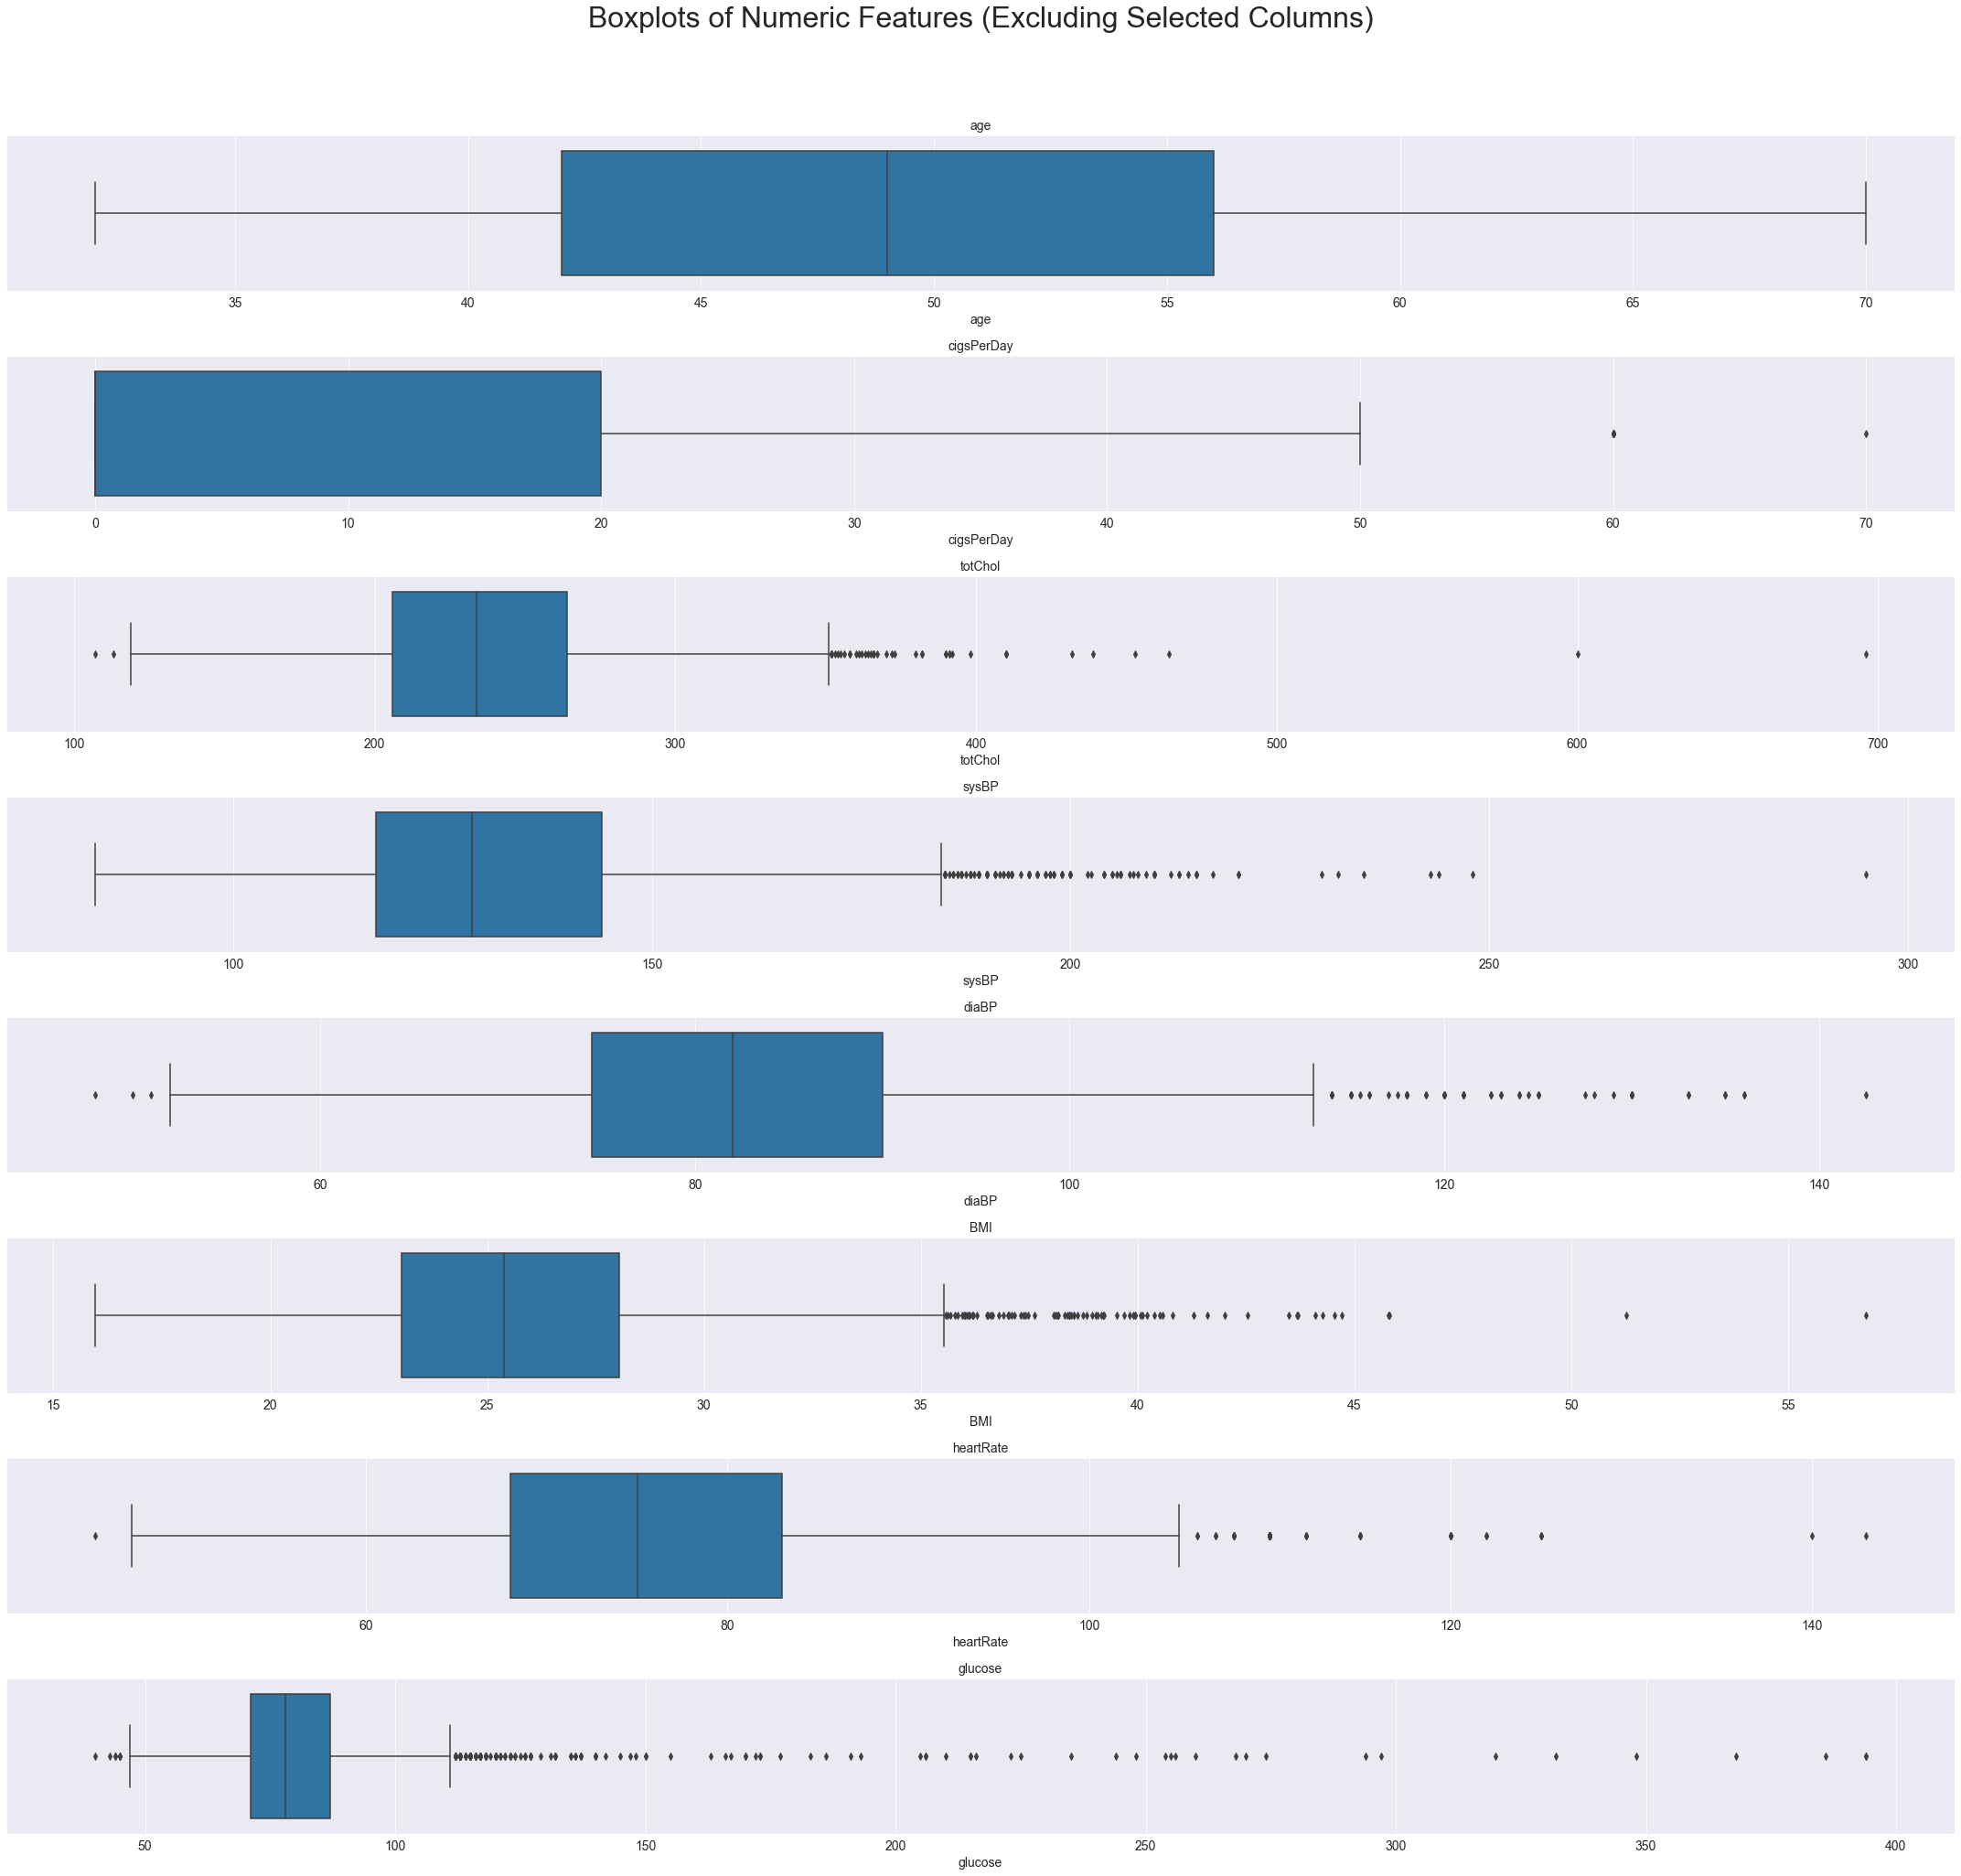

In [16]:
plt.figure(figsize=(30, 30))

plt.suptitle("Boxplots of Numeric Features (Excluding Selected Columns)", fontsize=32)

for i, col in enumerate(df_numeric_filtered.columns):
    plt.subplot(len(df_numeric_filtered.columns), 1, i + 1) 
    sns.boxplot(x=df_numeric_filtered[col])  
    plt.title(col, fontsize=14)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

#### Distribution of Data

In [17]:
df_numeric_filtered.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3368.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000
mean,49.542183,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520
std,8.592878,11.879078,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753
min,32.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


Looking at the boxplot and the summary chart above, Most of the data is skewed, but glucose is significantly skewed.

In [18]:
df['TenYearCHD'].value_counts(normalize = True)

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

Here, out the total data we have only 15% of the data is of people with 10 year risk of coronary heart disease CHD and rest 85%  without. There is a significant imbalance in data. Looking this in graph below:

Note: (binary: “1”, means “Yes”, “0” means “No”)

#### Categorical Features 

In [19]:
num_columns_to_exclude = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

df_cat = df.drop(columns=num_columns_to_exclude, errors='ignore') 

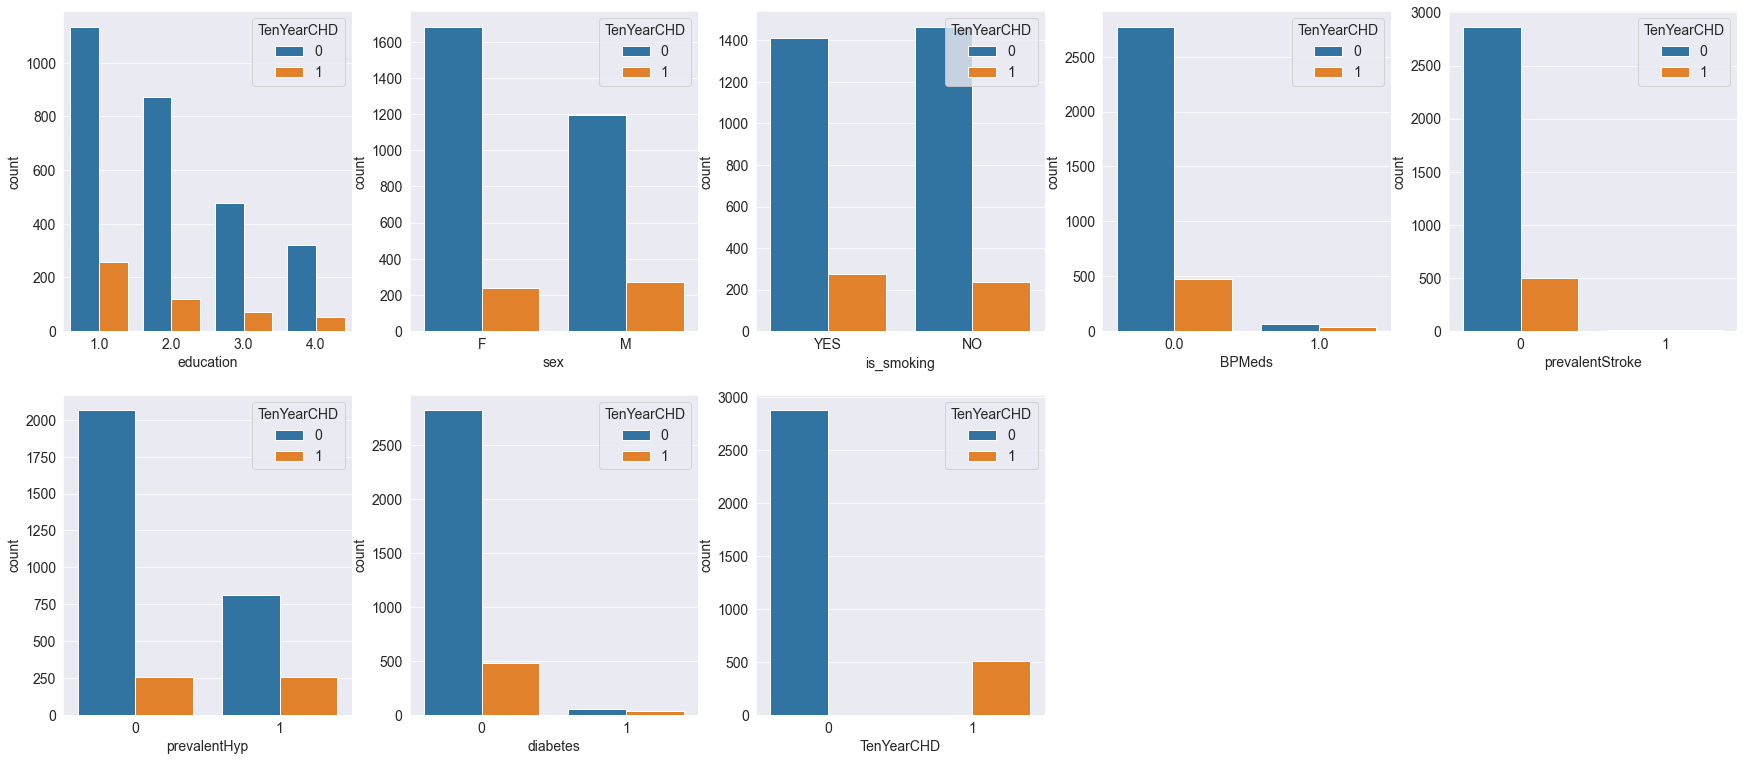

In [20]:
plt.figure(figsize = (30, 20))

for i in enumerate(df_cat.columns):
    plt.subplot(3,5,i[0]+1)
    sns.countplot(x=i[1],hue = 'TenYearCHD', data = df)

The dataset has severe class imbalance problem with: prevalentStroke , diabetes, BPMeds, education variables, as well as the target variable TenYearCHD is also imbalanced.

## Data Transformation
Encoding the categorical features into 1 and 0 for the features below.

In [21]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [22]:
smokercode = {'YES': 1, 'NO': 0}
df['is_smoking'] = df.is_smoking.map(smokercode) 
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [23]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [24]:
sexcode = {'F': 1, 'M': 0}
df['sex'] = df.sex.map(sexcode)
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,0,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


## Correlation and Multicollinearity Analysis

#### Correlation with Target Variable CHD

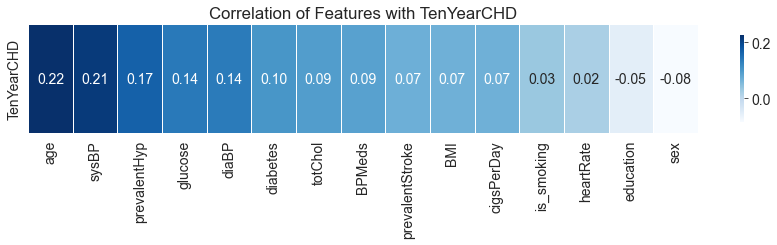

In [25]:
correlation_matrix = df.corr()

ten_year_chd_corr = correlation_matrix['TenYearCHD'].drop('TenYearCHD').sort_values(ascending=False)

ten_year_chd_corr_df = ten_year_chd_corr.to_frame()

# Create a heatmap
plt.figure(figsize=(15, 2))

sns.heatmap(
    ten_year_chd_corr_df.T,  # Transpose to make it horizontal
    cmap="Blues",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation of Features with TenYearCHD")
plt.show()

age, sysBP, prevalentHyp, glucose, diaBP and diabetes have some positive correlation with the target CHD while education and sex have negative relationship with target CHD.

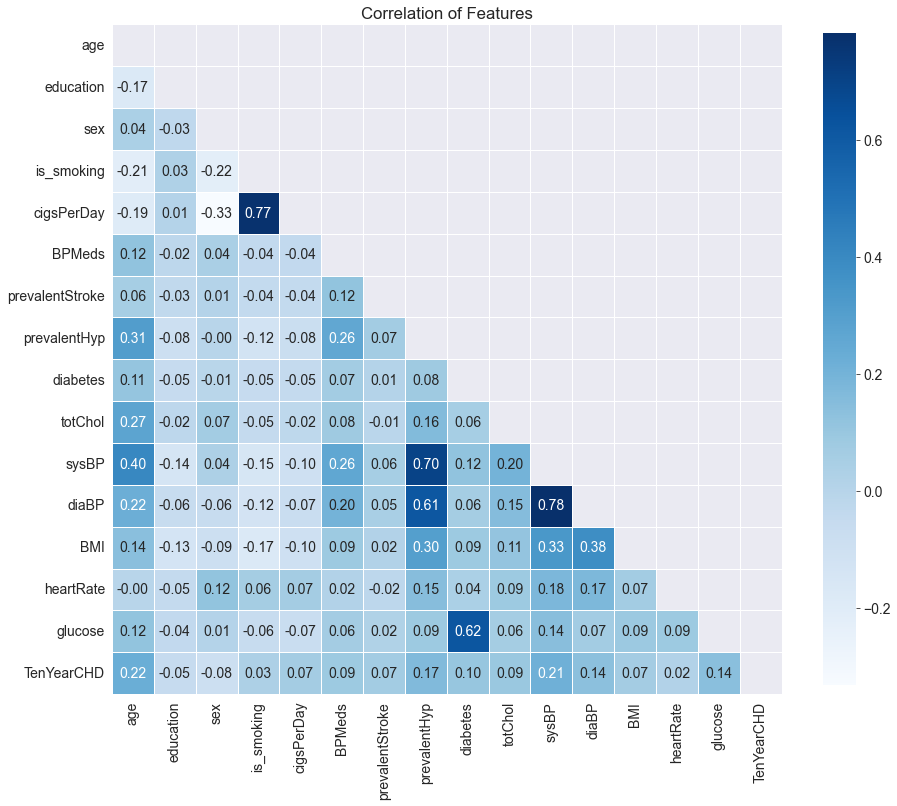

In [26]:
corr = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 15))

sns.heatmap(
    corr, 
    mask=mask,  
    cmap="Blues",  
    annot=True,  
    fmt=".2f",  
    linewidths=0.5, 
    square=True,  
    cbar_kws={"shrink": 0.8}  
)

plt.title("Correlation of Features")


plt.show()

**Findings**
- cigsPerDay and is_smoking have a high correlation denoting a strong positive relationship. 
- sysBP has a strong relationship with prevalentHyp and diaBP, 
- diabetes and glucose have a positive relationship
- prevalentHyp and diaBP also have a positive relationship.

**Actions**
- removing is_smoking, diaBP from training to avoid multicolinearity as they have lower correlation with the Target CHD. 
- removing glucose as it has 9% i.e 304 missing values and 158 of the non-null values are outlier.
- dropping education as at this point it is unclear what the 1,2,34 represents and it has low correlation with target CHD.

In [27]:
df_filtered = df.drop(columns = ['education'])

## Replacing Null Values  for the Predictors
As we come to end of exploring our data, we will now replace the null values with mean/median/mode as necessary.

In [28]:
df_filtered['cigsPerDay'] = df_filtered['cigsPerDay'].fillna(df['cigsPerDay'].median())
df_filtered['BPMeds'] = df_filtered['BPMeds'].fillna(df['BPMeds'].mode()[0])
df_filtered['totChol'] = df_filtered['totChol'].fillna(df['totChol'].median())
df_filtered['BMI'] = df_filtered['BMI'].fillna(df['BMI'].median())
df_filtered['heartRate'] = df_filtered['heartRate'].fillna(df['heartRate'].median())
df_filtered['glucose'] = df_filtered['glucose'].fillna(df['glucose'].median())
df_filtered.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
df_filtered.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,0.567257,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Creating and Training the Model

#### Split Test and Train

In [30]:
X = df_filtered.drop(columns=["TenYearCHD"])
y = df_filtered["TenYearCHD"] 

X = sm.add_constant(X)  # Adds an intercept term to the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2712, 15), y_train shape: (2712,)
X_test shape: (678, 15), y_test shape: (678,)


#### Training the Model

In [31]:
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(solver='liblinear')  # 'liblinear' supports small datasets
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print feature importance
print("Feature Coefficients:", model.coef_)

Accuracy: 0.8525073746312685
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       574
           1       0.67      0.08      0.14       104

    accuracy                           0.85       678
   macro avg       0.76      0.53      0.53       678
weighted avg       0.83      0.85      0.80       678

Feature Coefficients: [[-3.17822770e+00  5.38665185e-02 -4.94865099e-01 -3.76850227e-02
   2.27857941e-02 -9.21544511e-02  1.07022432e+00  1.97928400e-01
   3.25181094e-01  2.38932039e-03  1.90868116e-02 -7.66676187e-03
  -2.09249965e-02 -1.03084656e-02  7.46482074e-03]]


#### Obeservations
1.	The baseline model is biased towards Class 0 (No CHD):
	- High recall for Class 0 (99%) but very low recall for Class 1 (8%).
	- It rarely detects CHD cases, making it unreliable for medical predictions.
2. False negatives are high for CHD cases:
	-	Many actual CHD cases are being misclassified as non-CHD.
	-	This could be dangerous in real-world applications (e.g., patient diagnosis).
3. Class imbalance is likely an issue:
	-	Only 104 cases of CHD vs. 574 non-CHD.
	-	SMOTE (Synthetic Minority Over-sampling Technique) or class weighting should be applied to improve recall for CHD.
    
#### Next Steps for Improvement:
- Balance the dataset (e.g., SMOTE, undersampling, or class weighting).
- Use a different model (e.g., Random Forest, XGBoost).
- Tune hyperparameters (adjust decision thresholds, regularization).
- Collect more CHD cases to improve model learning.

### Using The Synthetic Minority Oversampling (SMOTE) to Balance the Dataset
Earlier we noticed that the target variable were not evenly distributed. The number of data representing 'No' was higher than 'Yes' causing the imbalance. As we see in our results after training the model, imbalanced data can lead to biased models that perform well on the majority class but fail to correctly classify the minority class. This is especially important in classification problems where the target variable is unevenly distributed. i.e. the model can become biased and performs poorly on the minority class.

To prevent such cases, we oversample the data using SMOTE. It duplicates the minority class example.


In [32]:
!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(random_state=0)

# Oversample training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape

((4610, 15), (4610,))

In [34]:
y_train_resampled.value_counts(normalize = True)

0    0.5
1    0.5
Name: TenYearCHD, dtype: float64

After SMOTE, we can see that the count for each categories are identical, i.e the target feature is evenly distributed. 

Let's retrain our model with the new oversampled dataset.

In [35]:
model = LogisticRegression(solver='liblinear', penalty='l2')  # Using L1 regularization

model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print feature importance
print("Feature Coefficients:", model.coef_)

Accuracy: 0.6371681415929203
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       574
           1       0.22      0.52      0.31       104

    accuracy                           0.64       678
   macro avg       0.55      0.59      0.53       678
weighted avg       0.78      0.64      0.69       678

Feature Coefficients: [[-3.27653719  0.0600759  -1.32250668 -0.95299239  0.04250252  0.01357123
  -0.02290102 -0.69119901 -0.57013635  0.00557805  0.02980197 -0.00472243
  -0.03826269 -0.00705984  0.00987267]]


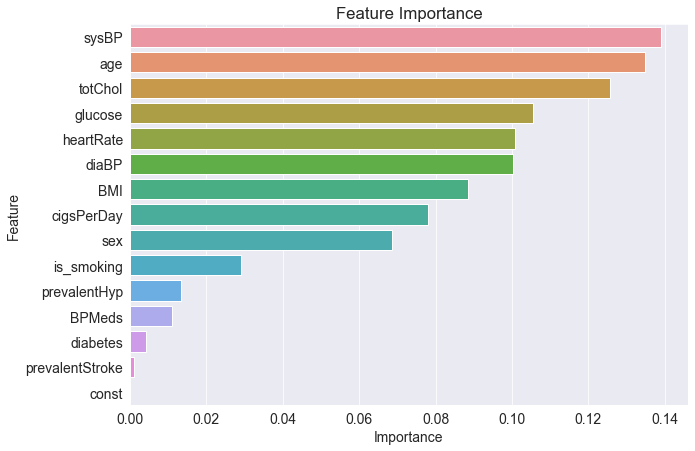

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance")
plt.show()

In [37]:
X_train_new = X_train_resampled.drop(columns = ['prevalentStroke', 'diabetes', 'BPMeds', 'is_smoking', 'prevalentHyp'])
X_test_new = X_test.drop(columns = ['prevalentStroke', 'diabetes', 'BPMeds','is_smoking', 'prevalentHyp'])

In [38]:
X_train_new

,const,age,sex,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,54,1,0.000000,272.000000,146.000000,95.000000,23.660000,72.000000,80.000000
1,1.0,37,0,9.000000,237.000000,102.000000,72.000000,19.680000,67.000000,83.000000
2,1.0,39,0,43.000000,291.000000,177.500000,100.000000,25.740000,67.000000,91.000000
3,1.0,55,1,0.000000,225.000000,136.500000,85.500000,20.560000,60.000000,90.000000
4,1.0,59,0,0.000000,237.000000,131.500000,84.000000,24.170000,90.000000,94.000000
...,...,...,...,...,...,...,...,...,...,...
4605,1.0,42,0,18.856905,165.485192,88.643926,53.399667,19.000762,75.799335,63.457238
4606,1.0,50,0,9.145903,202.512458,183.875415,119.120986,32.848286,66.708195,73.879014
4607,1.0,57,1,0.000000,313.188900,152.874002,89.527556,25.849525,68.000000,72.000000
4608,1.0,60,0,9.119157,214.455958,114.331599,67.287557,26.563105,72.440422,94.088084


In [39]:
X_test_new

,const,age,sex,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
1296,1.0,64,1,9.0,342.0,128.0,71.0,20.52,60.0,62.0
663,1.0,61,0,10.0,258.0,130.0,70.0,24.35,67.0,78.0
648,1.0,58,0,0.0,333.0,139.0,96.0,28.38,75.0,78.0
2715,1.0,46,0,0.0,235.0,136.5,92.0,22.92,68.0,89.0
1678,1.0,65,1,0.0,245.0,171.0,89.0,23.07,82.0,93.0
...,...,...,...,...,...,...,...,...,...,...
2415,1.0,56,0,20.0,278.0,133.0,84.0,22.67,85.0,96.0
1959,1.0,64,1,0.0,232.0,149.5,84.0,20.49,68.0,96.0
817,1.0,48,0,0.0,243.0,116.0,82.0,26.09,80.0,85.0
3121,1.0,39,0,5.0,227.0,132.0,92.0,26.47,63.0,74.0


In [40]:
model = LogisticRegression(solver='liblinear', penalty='l2')  

model.fit(X_train_new, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_new)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print feature importance
print("Feature Coefficients:", model.coef_)

Accuracy: 0.6386430678466076
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       574
           1       0.24      0.61      0.34       104

    accuracy                           0.64       678
   macro avg       0.57      0.63      0.55       678
weighted avg       0.80      0.64      0.69       678

Feature Coefficients: [[-2.86972757  0.06129892 -1.34079239  0.01225588  0.00587578  0.02155951
  -0.00589477 -0.03459907 -0.00726191  0.00758463]]


### Odd Ratio
The odds ratio tells us how much each feature influences the likelihood of developing coronary heart disease (CHD).

* If Odds Ratio > 1, the feature increases the risk of CHD.
* If Odds Ratio < 1, the feature decreases the risk of CHD.
* If Odds Ratio ≈ 1, the feature has little to no effect on CHD risk. 

In [41]:
odds_ratios = np.exp(model.coef_[0])
feature_impact = pd.DataFrame({'Feature': X_train_new.columns, 'Odds Ratio': odds_ratios})
print(feature_impact.sort_values(by="Odds Ratio", ascending=False))

      Feature  Odds Ratio
1         age    1.063217
5       sysBP    1.021794
3  cigsPerDay    1.012331
9     glucose    1.007613
4     totChol    1.005893
6       diaBP    0.994123
8   heartRate    0.992764
7         BMI    0.965993
2         sex    0.261638
0       const    0.056714


Looking at the odd ratios above, we can say that:
1. Biggest Risk Factors for CHD:

	* age is the strongest factor, meaning people with higher age are at a higher risk. 
	* CigsPerDay is another strong predictor.
	* SysBP also increase CHD risk.
    
    
2.	Protective Factors Against CHD:

	* heartrate appear to lower CHD risk 
    * Being female - Women have almost half the risk of CHD compared to men.
    
    
3. Unexpected Findings:
	* diaBP appear to lower CHD risk 
        * Treatment of BP and HP-related issues may reduce risk.
	* Requires further investigation before making conclusions.
    

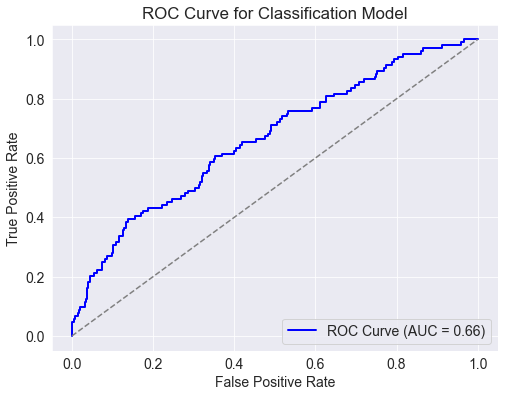

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test_new)[:, 1]  # Get probability of positive class

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC score

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Classification Model")
plt.legend(loc="lower right")
plt.show()

### Takeaway
* The model performs with overall recall of 0.6.
* However, AUC = 0.66, meaning the performance of the model is still poor and can be improved.

### Improvements

This is a quick analysis and a lot of improvements could be made to it.

1. Feature Engineering and Selection

    The current model uses most of the features to train the model. We can remove other least important features as identified by random forest model. Removing irrelevant features can help optimize the model and increase model accuracy and reduce computation time.
    
    
2. Model Performance Optimization

    Try other classification models to compare performance. I have only used logistic regression.
    
    
3. Cross-Validation for Robust Performance

    My model is trained and tested on only one split, which may not generaliza the results. Need to validate the result on validation data to ensure the model is stable and not overfitting to a single train-test split.